<a href="https://colab.research.google.com/github/imrazack-cisco/bits/blob/main/MFML%20Assignment%20Momentum%20Gradient%20Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

alpha = 0.01, beta = 0
--------------------------------------------------
Iteration |       x      |   ∇f(x)   |   |∇f(x)|  
--------------------------------------------------
    1     |    0.5000    |  -3.0000  |   3.0000  
    2     |    0.5300    |  -3.0191  |   3.0191  
    3     |    0.5602    |  -3.0158  |   3.0158  
    4     |    0.5903    |  -2.9894  |   2.9894  
    5     |    0.6202    |  -2.9398  |   2.9398  
    6     |    0.6496    |  -2.8675  |   2.8675  
    7     |    0.6783    |  -2.7741  |   2.7741  
    8     |    0.7061    |  -2.6615  |   2.6615  
    9     |    0.7327    |  -2.5326  |   2.5326  
   10     |    0.7580    |  -2.3905  |   2.3905  
   11     |    0.7819    |  -2.2386  |   2.2386  
--------------------------------------------------
Max iterations reached
--------------------------------------------------
Final x value for alpha=0.01 and beta = 0: 0.7819

X and Gradient values for each iteration
x0=0.5000 g0=-3.0000 x1=0.5300 g1=-3.0191 x2=0.5602 g2=-3

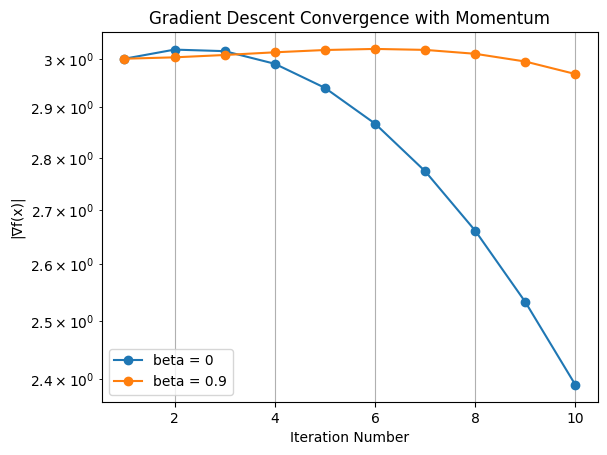

alpha = 0.01, beta = 0
--------------------------------------------------
Iteration |       x      |   ∇f(x)   |   |∇f(x)|  
--------------------------------------------------
    1     |    0.5000    |  -3.0000  |   3.0000  
    2     |    0.5300    |  -3.0191  |   3.0191  
    3     |    0.5602    |  -3.0158  |   3.0158  
    4     |    0.5903    |  -2.9894  |   2.9894  
    5     |    0.6202    |  -2.9398  |   2.9398  
    6     |    0.6496    |  -2.8675  |   2.8675  
    7     |    0.6783    |  -2.7741  |   2.7741  
    8     |    0.7061    |  -2.6615  |   2.6615  
    9     |    0.7327    |  -2.5326  |   2.5326  
   10     |    0.7580    |  -2.3905  |   2.3905  
   11     |    0.7819    |  -2.2386  |   2.2386  
--------------------------------------------------
Max iterations reached
--------------------------------------------------
Final f(x) value for alpha=0.01 and beta = 0: 38.2730

alpha = 0.01, beta = 0.9
--------------------------------------------------
Iteration |       

In [16]:
import matplotlib.pyplot as plt
import math

def f(x):
    """The function f(x) = x^4 + 2x^3 - 5x^2 + 40."""
    return x**4 + 2*x**3 - 5*x**2 + 40

def df(x):
    """The derivative (gradient) of f(x)."""
    return 4*x**3 + 6*x**2 - 10*x

def gradient_descent_with_momentum(x0, alpha, beta, max_iterations=10, tolerance=0.0001):
    """Performs gradient descent with momentum."""
    x = x0
    v = 0  # Initialize velocity
    iterations = []
    gradient_magnitudes = []
    x_values = []
    gradients = []

    print(f"alpha = {alpha}, beta = {beta}")
    print("--------------------------------------------------")
    print("Iteration |       x      |   ∇f(x)   |   |∇f(x)|  ")
    print("--------------------------------------------------")

    for i in range(max_iterations):
        gradient = df(x)
        gradient_magnitude = abs(gradient)
        iterations.append(i + 1)
        gradient_magnitudes.append(gradient_magnitude)
        x_values.append(x)
        gradients.append(gradient)

        print(f"{i+1:^9} | {x:^12.4f} | {gradient:^9.4f} | {gradient_magnitude:^10.4f}")

        if gradient_magnitude < tolerance:
            print("--------------------------------------------------")
            print("Tolerance reached")
            print("--------------------------------------------------")
            break

        v = beta * v + (1 - beta) * alpha * gradient  # Momentum update
        x = x - v

    else: #runs if the loop completes without break
        gradient = df(x) #calculate the gradient one last time
        gradient_magnitude = abs(gradient)
        x_values.append(x) #append the last x value
        gradients.append(gradient)
        print(f"{max_iterations+1:^9} | {x:^12.4f} | {gradient:^9.4f} | {gradient_magnitude:^10.4f}") #Print last values
        print("--------------------------------------------------")
        print("Max iterations reached")
        print("--------------------------------------------------")

    return iterations, gradient_magnitudes, x, x_values, gradients

# Initial value
x0 = 0.5

# Learning rate
alpha = 0.01

# Momentum parameters
betas = [0, 0.9]

for beta in betas:
    iterations, gradient_magnitudes, final_x, x_values, gradients = gradient_descent_with_momentum(x0, alpha, beta)

    # Plot
    plt.plot(iterations, gradient_magnitudes, marker='o', label=f"beta = {beta}")
    print(f"Final x value for alpha=0.01 and beta = {beta}: {final_x:.4f}")
    print()

    #Print x and gradient values for each iteration
    print("X and Gradient values for each iteration")
    for i, (x,g) in enumerate(zip(x_values,gradients)):
        print(f"x{i}={x:.4f} g{i}={g:.4f}",end=" ")
    print("\n")

plt.xlabel("Iteration Number")
plt.ylabel("|∇f(x)|")
plt.title("Gradient Descent Convergence with Momentum")
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()

#Print final f(x) values
for beta in betas:
    iterations, gradient_magnitudes, final_x, x_values, gradients = gradient_descent_with_momentum(x0, alpha, beta)
    final_fx = f(final_x)
    print(f"Final f(x) value for alpha=0.01 and beta = {beta}: {final_fx:.4f}")
    print()